In [1]:
import mib_v2 as mb
import matplotlib.pyplot as plt
import time

# Problema de prueba

## Planteamiento
Genarar una grafica del rendimiento del motor de inferencia con problema pequeño y con tres eventon con distribuciones uniformes, donde su cardinalidad de los tres va de uno a cien.


## Variables
A = \{0, 2, ..., n-1\}

B = \{0, 2, ..., n-1\}

C = \{0, 2, ..., n-1\}

## Modelo del problema
$P(ABC) = P(A)P(B|A)P(C|AB)$.

In [2]:
n = 100

times = []
x_vector = [i+1 for i in range(n)]


for i in range(n):
    Events = set([x for x in range(i+1)])
    
    dA = {}
    dB_A = {}
    dC_AB = {}
    
    valPA = 1 / (i+1)
    valPBUA = 1 / ((i+1) ** 2)
    valPCUAUB = 1 / ((i+1) ** 3)
    
    for x in range(i+1):
        dA[x] = valPA
        
        dB_A[(x,)] = {}
        for y in range(i+1):
            dB_A[(x,)][y] = valPBUA / valPA
            
            dC_AB[(x,y)] = {}
            for z in range(i+1):
                dC_AB[(x,y)][z] = valPCUAUB / valPBUA   
    
    A = mb.Var(Events)
    PA = mb.Distrib(A,dA)
    B = mb.Var(Events)
    PB_A = mb.CondDistrib(B,[A],dB_A)
    C = mb.Var(Events)
    PC_AB = mb.CondDistrib(C,[A,B],dC_AB)
    
    # Probabilidad conjunta (modelo)
    PABC = mb.JointDistrib([A,B,C], [PA, PB_A, PC_AB])

    # Motor de inferencia
    mib = mb.Mib(PABC)
    
    inicio = time.time()
    PA_BC = mib.CondInference_Dist(A, set([B,C]))
    fin = time.time()
    tiempo_ejecucion = fin - inicio
    times.append(tiempo_ejecucion)

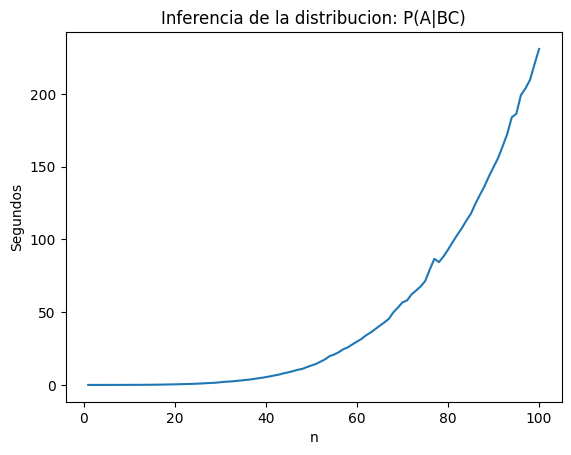

In [3]:
fig, ax = plt.subplots()
ax.plot(x_vector, times)
ax.set_xlabel("n")
ax.set_ylabel("Segundos")
ax.set_title('Inferencia de la distribucion: P(A|BC)')
plt.show()

In [17]:
times10 = []
x10 = []
for i in range(10):
    times10.append(times[i*10])
    x10.append((i+1)*10)
times10.append(times[n-1])
x10.append(n)

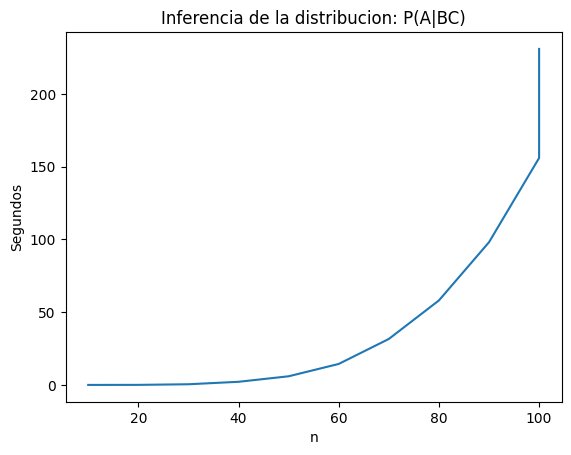

In [18]:
fig, ax = plt.subplots()
ax.plot(x10, times10)
ax.set_xlabel("n")
ax.set_ylabel("Segundos")
ax.set_title('Inferencia de la distribucion: P(A|BC)')
plt.show()

In [25]:
t = 0
for i in times:
    t += i
print(t/60)

78.25993410348892
